# Data Science

We will train 5 different models in 2 experiments, and for each on eadjuste hiperparameters. Also, we will load every run into mlflow.

**Models**
* Logistic Regression
* Random Forest Classifier
* XGBoost Classifier
* Support Vector Classification
* Balanced Random Forest Classifier


### Libraries

In [1]:
from pprint import pprint

import matplotlib.pyplot as plt
import mlflow
import pandas as pd
import seaborn as sns
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    average_precision_score,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier


### Load data

In [ ]:
# Comment once you run this line
%load_ext kedro.ipython
#%reload_kedro

[06/08/25 00:30:09] INFO     Resolved project path as: C:\Users\Esteban\Documents\. Clases_Tec\8.   __init__.py:180
                             Octavo semestre\_Proyecto\kProject\tcaproject.                                        
                             To set a different path, run '%reload_kedro <project_root>'                           

[06/08/25 00:30:10] INFO     Registering new custom resolver: 'km.random_name'                    mlflow_hook.py:65

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:233
                             the product. No personal data or IP addresses are stored on our side. If              
                             you want to opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK`              
                             environment variables, or create a `.telemetry` file in the current                   
                             working directory with the contents `consent: false`. Read more at                    
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[06/08/25 00:30:11] INFO     Kedro project tcaProject                                               __init__.py:146

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:147
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        __init__.py:153

In [14]:
df_exp1 = catalog.load("reservaciones_exp1") # type: ignore # noqa: F821
df_exp2 = catalog.load("reservaciones_exp2") # type: ignore # noqa: F821


[06/08/25 00:30:16] INFO     Loading data from reservaciones_exp1 (ParquetDataset)...           data_catalog.py:403

                    INFO     Loading data from reservaciones_exp2 (ParquetDataset)...           data_catalog.py:403

### EDA

In [22]:
df_exp1.reset_index(drop=True).head(10)

,numero_personas,numero_adultos,numero_menores,numero_noches,total_habitaciones,total_habitaciones_empresa,cupo_tipo_habitacion,reservacion_pendiente,total_tarifa,reservacion,cancelacion,dias_llegada-reservacion,dias_salida-llegada,nombre_agencia_te,ciudad_agencia_te,entidad_federativa_agencia_te,nombre_estado_te
0,1.0,1.0,0.0,1.000000,1.0,0.0,0.0,1.0,0.362198,1.0,0.0,-0.612403,1.508475,0.393016,0.860719,0.408703,0.380522
1,2.0,1.5,0.0,1.000000,1.0,0.0,0.0,1.0,0.271654,1.0,0.0,-0.930233,1.508475,0.393016,0.860719,0.408703,0.000000
2,1.0,1.0,0.0,1.333333,1.0,0.0,0.0,1.0,1.820523,1.0,0.0,-0.930233,2.016949,0.721399,0.496522,0.324116,0.380522
3,1.0,1.0,0.0,0.666667,1.0,0.0,0.0,1.0,1.199608,1.0,0.0,-0.062016,-0.016949,0.721399,0.496522,0.324116,-0.091993
4,1.5,1.0,0.0,1.333333,1.0,0.0,0.0,1.0,0.346950,1.0,0.0,-0.046512,0.016949,0.393016,0.860719,0.408703,1.915780
5,1.0,1.0,0.0,1.333333,1.0,0.0,0.0,1.0,0.346950,1.0,0.0,0.294574,0.016949,0.393016,0.860719,0.408703,-0.091993
6,1.0,1.0,0.0,2.333333,1.0,0.0,0.0,1.0,0.953159,1.0,0.0,-0.302326,0.067797,0.393016,0.860719,0.408703,0.380522
7,0.5,0.5,0.0,1.000000,1.0,0.0,0.0,1.0,0.364105,1.0,0.0,1.069767,1.508475,0.393016,0.860719,0.408703,-0.091993
8,1.0,1.0,0.0,1.000000,1.0,0.0,0.0,1.0,0.278322,1.0,0.0,0.403101,0.000000,0.393016,0.860719,0.408703,-0.091993
9,1.0,1.0,0.0,1.333333,1.0,0.0,0.0,1.0,1.929510,1.0,0.0,-0.496124,0.016949,0.393016,0.496522,0.324116,-0.091993


In [17]:
df_exp2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199813 entries, 0 to 203001
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   nombre_paquete          199813 non-null  float64
 1   ciudad_agencia          199813 non-null  float64
 2   nombre_tipo_habitacion  199813 non-null  float64
 3   nombre_canal            199813 non-null  float64
 4   nombre_estado           199813 non-null  float64
 5   cancelacion             199813 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 10.7 MB


In [18]:
print(df_exp1.isna().sum().sum())
print(df_exp2.isna().sum().sum())

0
0


**Correlation plots**

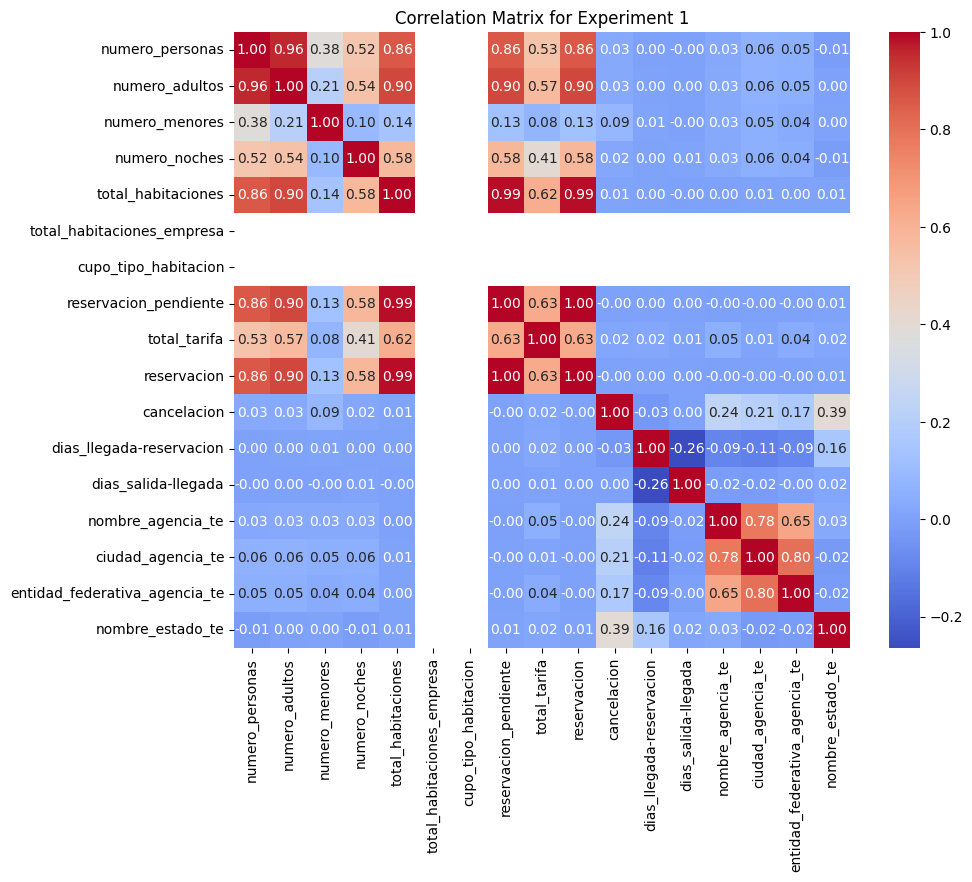

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_exp1.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Experiment 1")
plt.show()

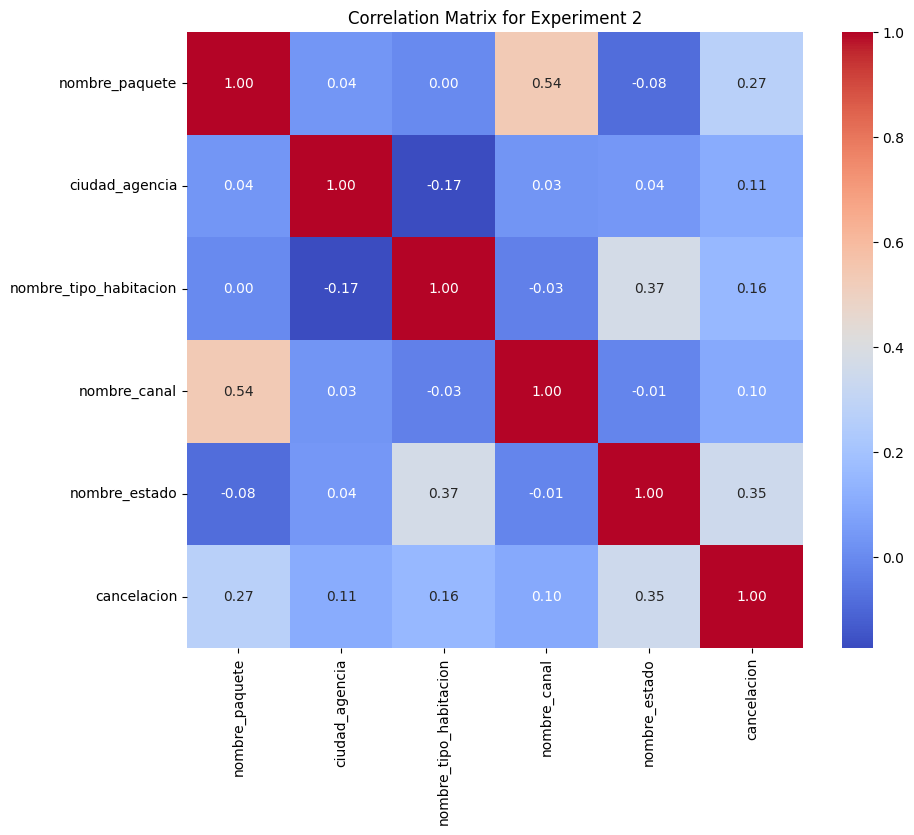

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_exp2.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix for Experiment 2")
plt.show()

**Violin plots**

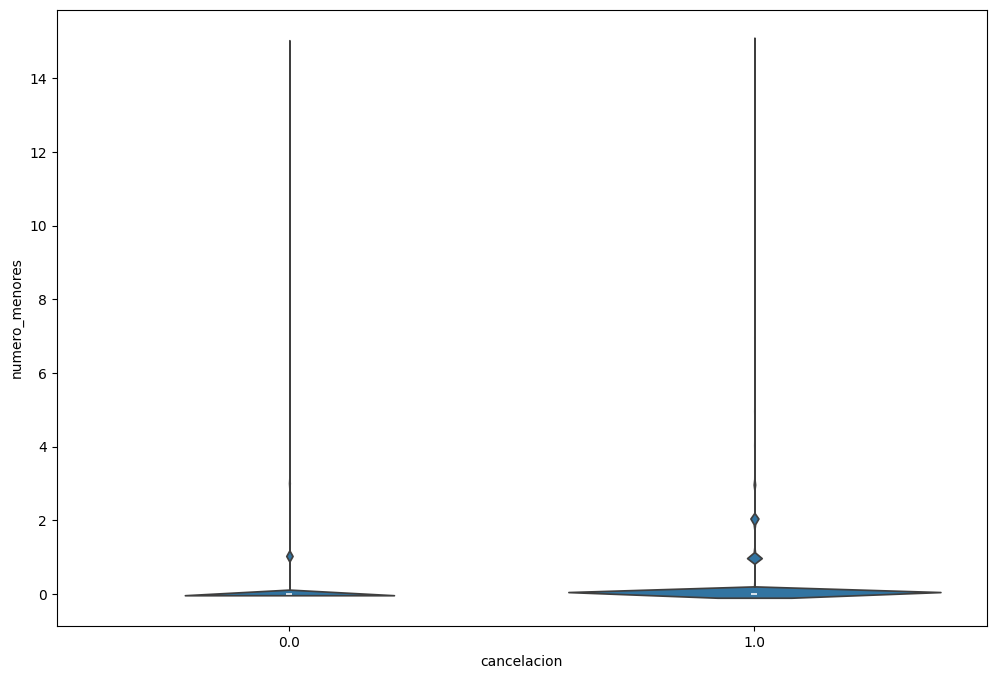

In [12]:
# Violint plot for each variable by cancelation
plt.figure(figsize=(12, 8))
sns.violinplot(x="cancelacion", y="numero_menores", data=df_exp1)
plt.show()

### Load frst runs in MLflow

In [9]:
mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")

**Train model: Experiment1**

In [10]:
# Define the target variable and independent variables
X = df_exp1.drop('cancelacion', axis=1)
y = df_exp1['cancelacion']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
params = {
    'class_weight': 'balanced',
    'random_state': 42
    }

lg = LogisticRegression(**params)

lg.fit(X_train, y_train)

# Evaluation
y_pred = lg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No Cancellation', 'Cancellation']))

                 precision    recall  f1-score   support

No Cancellation       0.95      0.79      0.86     33896
   Cancellation       0.42      0.77      0.54      6603

       accuracy                           0.79     40499
      macro avg       0.68      0.78      0.70     40499
   weighted avg       0.86      0.79      0.81     40499



**Train Model: Experment 2**

In [11]:
# Define the target variable and independent variables
X = df_exp2.drop('cancelacion', axis=1)
y = df_exp2['cancelacion']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define logistic regression model
params = {
    'class_weight': 'balanced',
    'random_state': 42
    }

lg = LogisticRegression(**params)

lg.fit(X_train, y_train)

# Evaluation
y_pred = lg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['No Cancellation', 'Cancellation']))

                 precision    recall  f1-score   support

No Cancellation       0.96      0.84      0.89     33219
   Cancellation       0.51      0.81      0.62      6744

       accuracy                           0.84     39963
      macro avg       0.73      0.82      0.76     39963
   weighted avg       0.88      0.84      0.85     39963

